In [51]:
import requests
import numpy as np
import pandas as pd
import sklearn.ensemble as sk
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [52]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


1. Creat three train data subsets: (1) with all features (2) without age (3) without age and Fare
===

In [146]:
train1=train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']].copy()
train2=train[['PassengerId','Pclass','Sex','SibSp','Parch','Fare','Embarked','Survived']].copy()
train3=train[['PassengerId','Pclass','Sex','SibSp','Parch','Embarked','Survived']].copy()
train1=train1.dropna()
train2=train2.dropna()
train3=train3.dropna()
print train1.shape
print train2.shape
print train3.shape
print train.shape

(712, 9)
(889, 8)
(889, 7)
(891, 12)


In [147]:
sex_dic={'male':0,'female':1}
embarked_dic={'S':0,'C':1,'Q':2}
def rename(df):
    df['Sex']=map(lambda x: sex_dic[x],df['Sex'])
    df['Embarked']=map(lambda x: embarked_dic[x],df['Embarked'])
    return df
train1=rename(train1)
train2=rename(train2)
train3=rename(train3)

In [148]:
sub_train1,sub_val1=sklearn.cross_validation.train_test_split(train1,test_size=0.33,random_state=99)
sub_train1=pd.DataFrame(sub_train1)
sub_train1.columns=train1.columns
sub_val1=pd.DataFrame(sub_val1)
sub_val1.columns=train1.columns
print sub_train1.shape
print sub_val1.shape

sub_train2,sub_val2=sklearn.cross_validation.train_test_split(train2,test_size=0.33,random_state=99)
sub_train2=pd.DataFrame(sub_train2)
sub_train2.columns=train2.columns
sub_val2=pd.DataFrame(sub_val2)
sub_val2.columns=train2.columns
print sub_train2.shape
print sub_val2.shape

sub_train3,sub_val3=sklearn.cross_validation.train_test_split(train3,test_size=0.33,random_state=99)
sub_train3=pd.DataFrame(sub_train3)
sub_train3.columns=train3.columns
sub_val3=pd.DataFrame(sub_val3)
sub_val3.columns=train3.columns
print sub_train3.shape
print sub_val3.shape

(477, 9)
(235, 9)
(595, 8)
(294, 8)
(595, 7)
(294, 7)


2. Import test data and split into three subsets: test1,test2,test3
===

In [149]:
test=pd.read_csv('test.csv')
test_sub=test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()
print test_sub.shape
test_sub.head()

(418, 8)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [150]:
test1=test_sub
test1=test1.dropna()
test1=rename(test1)
print test1.shape
test1.head()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(331, 8)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [151]:
test_nan=test_sub[test_sub.isnull().any(axis=1)]
print test_nan.shape

test2=test_nan.drop('Age',axis=1)
test2=test2.dropna()
test2=rename(test2)
print test2.shape

test3=test_nan.drop('Age',axis=1)
test3=test3[test3.isnull().any(axis=1)]
test3=rename(test3)
test3=test3.drop('Fare',axis=1)
print test3.shape

print test.shape[0]==test1.shape[0]+test2.shape[0]+test3.shape[0]

(87, 8)
(86, 7)
(1, 6)
True


In [152]:
test3.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked
152,1044,3,0,0,0,0


3. Train the train data
===

In [84]:
col=[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','intercept'],
      ['Pclass','Sex','SibSp','Parch','Fare','Embarked','intercept'],
        ['Pclass','Sex','SibSp','Parch','Embarked','intercept']]
def logistic_regression_train(train,i,col=col):
    train['intercept']=1.0
    cols=col[i-1]
    logit=sm.Logit(train['Survived'],train[cols])
    result=logit.fit()
    paras=result.params
    return paras

(1) subset 1
---

In [85]:
paras1=logistic_regression_train(sub_train1,1)
paras1

Optimization terminated successfully.
         Current function value: 0.459411
         Iterations 6


Pclass      -1.192451
Sex          2.322879
Age         -0.043910
SibSp       -0.403053
Parch       -0.067766
Fare         0.003065
Embarked     0.421022
intercept    2.686150
dtype: float64

(2) subset 2
---

In [86]:
paras2=logistic_regression_train(sub_train2,2)
paras2

Optimization terminated successfully.
         Current function value: 0.438216
         Iterations 6


Pclass      -0.791641
Sex          2.956908
SibSp       -0.318009
Parch        0.048062
Fare         0.001972
Embarked     0.122192
intercept    0.269353
dtype: float64

(3) subset 3
--

In [87]:
paras3=logistic_regression_train(sub_train3,3)
paras3

Optimization terminated successfully.
         Current function value: 0.438620
         Iterations 6


Pclass      -0.853969
Sex          2.952507
SibSp       -0.308715
Parch        0.080249
Embarked     0.142454
intercept    0.447442
dtype: float64

4. Validation and test
===

In [129]:
from math import exp
def probability(row,paras):
    z=paras[len(paras)-1]
    for i in np.arange(0,len(paras)-1):
        z=z+row[i]*paras[i]
    return 1/(1+exp(-1.0*z))

(1) subset 1
----

In [167]:
compare=sub_val1[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()
pred=[]
for ii in np.arange(len(compare.Pclass)):
    pred.append(probability(compare.iloc[ii],paras1))
sub_val1['Pred']=pred

*****
compute confusion matrix with gender considered
*****

In [168]:
temp=sub_val1[['Sex','Survived','Pred']].copy()
tempmale=temp[temp['Sex']==0]
tempfemale=temp[temp['Sex']==1]

In [169]:
def survive_cm(pp,df):
    temp=df[['Survived','Pred']].copy()
    temp['TF']=temp['Pred']>=pp
    cm=sklearn.metrics.confusion_matrix(temp['Survived'],temp['TF'])
    return cm

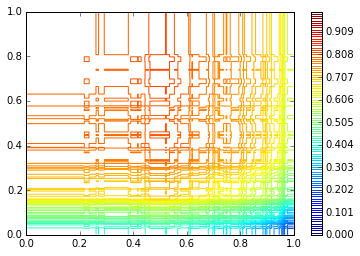

In [170]:
m1=[]
xlist=np.linspace(0,1,1000)
m1=map(lambda x: survive_cm(x,tempmale),xlist)
m2=[]
ylist=np.linspace(0,1,1000)
m2=map(lambda x: survive_cm(x,tempfemale),ylist)

mm=[]
for ii in m1:
    for jj in m2:
        cm=ii+jj
        mm.append((cm[0,0]+cm[1,1])*1.0/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]))
        
mmm=np.reshape(mm, (-1, len(xlist)))


contour_levels = np.linspace(0,1,100)
plt.contour(xlist,ylist,mmm,levels=contour_levels)
plt.colorbar()
plt.show()

In [171]:
matrix=np.asmatrix(mmm)
#print matrix.argmax()
#print matrix.argmax(0)
#print matrix.argmax(1)
ppm=xlist[677]
ppf=xlist[521]

In [172]:
compare=test1[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()
pred=[]
for ii in np.arange(len(compare.Pclass)):
    pred.append(probability(compare.iloc[ii],paras1))
test1['Pred']=pred
testmale=test1[test1['Sex']==0]
testfemale=test1[test1['Sex']==1]
testmale['Survived']=1*(testmale['Pred']>=ppm)
testfemale['Survived']=1*(testfemale['Pred']>=ppf)
test1=(pd.concat([testmale,testfemale])).sort('PassengerId')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [173]:
test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pred,Survived
0,892,3,0,34.5,0,0,7.8292,2,0.176525,0
1,893,3,1,47.0,1,0,7.0000,0,0.266255,0
2,894,2,0,62.0,0,0,9.6875,2,0.175165,0
3,895,3,0,27.0,0,0,8.6625,0,0.114029,0
4,896,3,1,22.0,1,1,12.2875,0,0.508121,0


(2) subset 2
---

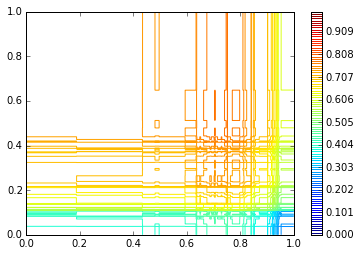

In [174]:
compare=sub_val2[['Pclass','Sex','SibSp','Parch','Fare','Embarked']].copy()
pred=[]
for ii in np.arange(len(compare.Pclass)):
    pred.append(probability(compare.iloc[ii],paras2))
sub_val2['Pred']=pred

temp=sub_val2[['Sex','Survived','Pred']].copy()
tempmale=temp[temp['Sex']==0]
tempfemale=temp[temp['Sex']==1]

m1=[]
xlist=np.linspace(0,1,1000)
m1=map(lambda x: survive_cm(x,tempmale),xlist)
m2=[]
ylist=np.linspace(0,1,1000)
m2=map(lambda x: survive_cm(x,tempfemale),ylist)

mm=[]
for ii in m1:
    for jj in m2:
        cm=ii+jj
        mm.append((cm[0,0]+cm[1,1])*1.0/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]))
        
mmm=np.reshape(mm, (-1, len(xlist)))


contour_levels = np.linspace(0,1,100)
plt.contour(xlist,ylist,mmm,levels=contour_levels)
plt.colorbar()
plt.show()

In [175]:
matrix=np.asmatrix(mmm)
#print matrix.argmax()
#print matrix.argmax(0)
#print matrix.argmax(1)
ppm=xlist[443]
ppf=xlist[747]

In [176]:
compare=test2[['Pclass','Sex','SibSp','Parch','Fare','Embarked']].copy()
pred=[]
for ii in np.arange(len(compare.Pclass)):
    pred.append(probability(compare.iloc[ii],paras2))
test2['Pred']=pred
testmale=test2[test2['Sex']==0]
testfemale=test2[test2['Sex']==1]
testmale['Survived']=1*(testmale['Pred']>=ppm)
testfemale['Survived']=1*(testfemale['Pred']>=ppf)
test2=(pd.concat([testmale,testfemale])).sort('PassengerId')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [177]:
test2.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Pred,Survived
10,902,3,0,0,0,7.8958,0,0.110073,0
22,914,1,1,0,0,31.6833,0,0.923938,1
29,921,3,0,2,0,21.6792,1,0.070657,0
33,925,3,1,1,2,23.4500,0,0.662778,0
36,928,3,1,0,0,8.0500,0,0.704166,0


(3) subset 3
---

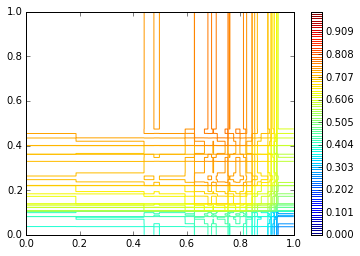

In [178]:
compare=sub_val3[['Pclass','Sex','SibSp','Parch','Embarked']].copy()
pred=[]
for ii in np.arange(len(compare.Pclass)):
    pred.append(probability(compare.iloc[ii],paras3))
sub_val3['Pred']=pred

temp=sub_val3[['Sex','Survived','Pred']].copy()
tempmale=temp[temp['Sex']==0]
tempfemale=temp[temp['Sex']==1]

m1=[]
xlist=np.linspace(0,1,1000)
m1=map(lambda x: survive_cm(x,tempmale),xlist)
m2=[]
ylist=np.linspace(0,1,1000)
m2=map(lambda x: survive_cm(x,tempfemale),ylist)

mm=[]
for ii in m1:
    for jj in m2:
        cm=ii+jj
        mm.append((cm[0,0]+cm[1,1])*1.0/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]))
        
mmm=np.reshape(mm, (-1, len(xlist)))


contour_levels = np.linspace(0,1,100)
plt.contour(xlist,ylist,mmm,levels=contour_levels)
plt.colorbar()
plt.show()

In [179]:
matrix=np.asmatrix(mmm)
#print matrix.argmax()
#print matrix.argmax(0)
#print matrix.argmax(1)
ppm=xlist[454]
ppf=xlist[743]

In [180]:
compare=test3[['Pclass','Sex','SibSp','Parch','Embarked']].copy()
pred=[]
for ii in np.arange(len(compare.Pclass)):
    pred.append(probability(compare.iloc[ii],paras3))
test3['Pred']=pred
testmale=test3[test3['Sex']==0]
testfemale=test3[test3['Sex']==1]
testmale['Survived']=1*(testmale['Pred']>=ppm)
testfemale['Survived']=1*(testfemale['Pred']>=ppf)
test3=(pd.concat([testmale,testfemale])).sort('PassengerId')

In [181]:
test3.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Pred,Survived
152,1044,3,0,0,0,0,0.107699,0


5.Results
===

In [182]:
result1=test1[['PassengerId','Survived']].copy()
result2=test2[['PassengerId','Survived']].copy()
result3=test3[['PassengerId','Survived']].copy()

In [183]:
frames=[result1,result2,result3]
results=pd.concat(frames)

In [185]:
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [186]:
results.to_csv('logistic_regression_gender_result.csv',header=True,index=False)

In [ ]:
ht